In [1]:
import json
import os
import re
import cv2
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import imutils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
#go into the results/images folder and extract the numbers for each file name and put them in a list

import os
import re

im_name = "eET-CALR"

#go into the results/images folder and extract the numbers for each file name and put them in a list
def get_image_numbers(file_path, im_name):
    image_numbers = []
    for filename in os.listdir(file_path):
        if filename.startswith(im_name):
            #remove im_name from the filename
            filename = filename.replace(im_name, "")
            image_numbers.append(int(re.search(r'\d+', filename).group()))
    return image_numbers

results_path = "/users/rittscher/qdv200/pytorch-CycleGAN-and-pix2pix/results/ihc2he/test_latest/images"
numbers = get_image_numbers(file_path=results_path, im_name=im_name)

In [95]:
numbers = list(set(numbers))
numbers.sort()

In [96]:
numbers

[0,
 10,
 101,
 102,
 105,
 107,
 116,
 119,
 126,
 131,
 132,
 137,
 146,
 148,
 150,
 1018,
 1028,
 1030,
 1032,
 1034,
 1037,
 1041,
 1055,
 1085,
 1088,
 1090,
 1094,
 1107,
 1114,
 1116,
 1122,
 1127,
 1131,
 1138,
 1141,
 1143,
 1144,
 1162,
 1166,
 1174,
 1176,
 1185,
 1190,
 1199,
 1201,
 1208,
 1216,
 1220,
 1238,
 1243,
 1244,
 1252,
 1257,
 1267,
 1271,
 1275,
 1276,
 1289,
 1295,
 1299,
 1303]

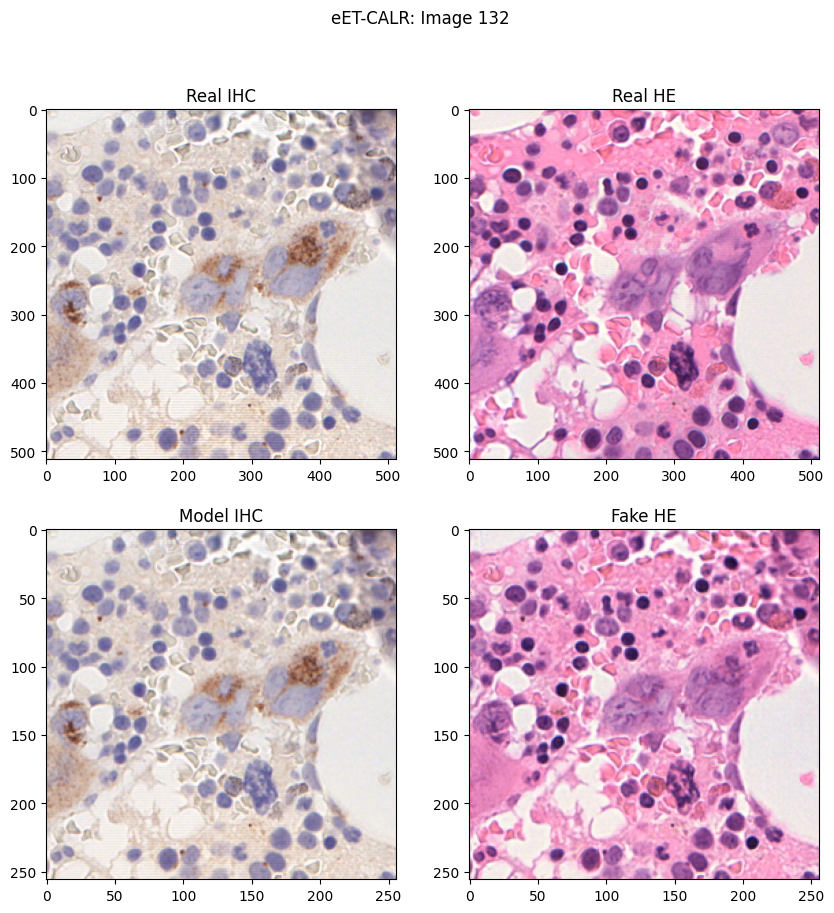

In [87]:
import cv2
import numpy as np


num = numbers[10]

#load the images

real_ihc_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testA/"
real_he_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testB/"
results_folder = "/users/rittscher/qdv200/pytorch-CycleGAN-and-pix2pix/results/ihc2he/test_latest/images/"

real_ihc = cv2.imread(real_ihc_folder + "{}_{}.png".format(im_name, num))
real_he = cv2.imread(real_he_folder + "{}_{}.png".format(im_name, num))
fake_he = cv2.imread(results_folder + "{}_{}_fake.png".format(im_name, num))
model_ihc = cv2.imread(results_folder + "{}_{}_real.png".format(im_name, num))

#plot the images as subplots

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(real_ihc)
ax[0,0].set_title("Real IHC")
ax[0,1].imshow(real_he)
ax[0,1].set_title("Real HE")
ax[1,0].imshow(model_ihc)
ax[1,0].set_title("Model IHC")
ax[1,1].imshow(fake_he)
ax[1,1].set_title("Fake HE")

#add the title to subplots
fig.suptitle("{}: Image {}".format(im_name, num))


#show the plot
plt.show()

In [55]:
#dict_ssim = {}

In [101]:
imageB = cv2.imread(results_folder + "{}_{}_fake.png".format(im_name, 150))
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
plt.imshow(grayB, cmap='gray')

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [102]:
#now for each patient I want t get the SSIM score for each image

from skimage.metrics import structural_similarity as compare_ssim
import cv2
import imutils

for num in numbers:
    
    if num != 150:

        imageA = cv2.imread(real_he_folder + "{}_{}.png".format(im_name, num))
        imageB = cv2.imread(results_folder + "{}_{}_fake.png".format(im_name, num))

        #resize the images to 256x256

        imageA = cv2.resize(imageA, (256, 256))

        # convert the images to grayscale

        grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

        # #show gray scale images

        # fig, ax = plt.subplots(1,2, figsize=(10,10))
        # ax[0].imshow(grayA, cmap="gray")
        # ax[0].set_title("Real HE")
        # ax[1].imshow(grayB, cmap="gray")
        # ax[1].set_title("Fake HE")

        # #show the plot
        # plt.show()

        # compute the Structural Similarity Index (SSIM) between the two
        # images, ensuring that the difference image is returned
        (score, diff) = compare_ssim(grayA, grayB, full=True)
        diff = (diff * 255).astype("uint8")
        image = im_name + "_" + str(num)
        dict_ssim[image] = score

In [103]:
dict_ssim

{'aET-CALR_13': 0.7688862327344985,
 'aET-CALR_20': 0.6738880030082237,
 'aET-CALR_23': 0.7521666479744822,
 'aET-CALR_26': 0.7916436096523566,
 'aET-CALR_29': 0.7788185170500622,
 'aET-CALR_33': 0.789006016846392,
 'aET-CALR_34': 0.5145739678765776,
 'aET-CALR_39': 0.7337677553081844,
 'aET-CALR_45': 0.7933470821477251,
 'aET-CALR_57': 0.7691332030349539,
 'aET-CALR_73': 0.7704735978785798,
 'aET-CALR_77': 0.7938495765535215,
 'aET-CALR_81': 0.7350636166181702,
 'aET-CALR_91': 0.4808763091736363,
 'aET-CALR_92': 0.5755537023689805,
 'aET-CALR_93': 0.7936825091888996,
 'aET-CALR_109': 0.7811277322160023,
 'aET-CALR_110': 0.7113706177756852,
 'aET-CALR_113': 0.6363467080196274,
 'aET-CALR_120': 0.7860944765037151,
 'aET-CALR_121': 0.7410160291474207,
 'aET-CALR_128': 0.6895505122523972,
 'aET-CALR_129': 0.7615808064252806,
 'aET-CALR_135': 0.8164449154511234,
 'aET-CALR_137': 0.7455228856622963,
 'aET-CALR_140': 0.7203327147992604,
 'aET-CALR_141': 0.7188179890400823,
 'aET-CALR_144': 0

In [105]:
#save dict_ssim as json file



dict_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ssim_scores"

with open(os.path.join(dict_path, '07062022_epoch110_6CALR1CD34_ssim_scores.json'), 'w') as fp:
    json.dump(dict_ssim, fp)


In [2]:
#open the json file

dict_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ssim_scores"

with open(os.path.join(dict_path, '07062022_epoch110_6CALR1CD34_ssim_scores.json'), 'r') as fp:
    dict = json.load(fp)


In [3]:
import pandas as pd
#get the keys in dictionary with im_name in them

#get string before first underscore in filenames

keys = [key.split("_")[0] for key in dict.keys()]
#make these keys unique
images = list(set(keys))

#make an empty dataframe and append the values to it

df = {}

for im_name in images:
    values = [dict[key] for key in dict.keys() if im_name in key]
    df[im_name] = values


/tmp/ipykernel_59246/2889934202.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist = False, kde = True,
/tmp/ipykernel_59246/2889934202.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist = False, kde = True,
/tmp/ipykernel_59246/2889934202.py:9: User

Text(0, 0.5, 'Density')

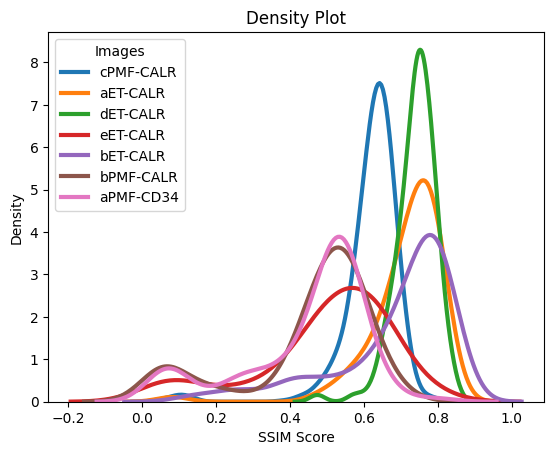

In [4]:
#make a histogram of df dictionary coloured by keys with matplotlib

# Iterate through the five airlines
for im in df.keys():
    # Subset to the airline
    values = df[im]
    
    # Draw the density plot
    sns.distplot(values, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = im)
    
# Plot formatting
plt.legend(title = 'Images')
plt.title('Density Plot')
plt.xlabel('SSIM Score')
plt.ylabel('Density')


In [6]:
#get the images where the structural similarity is less than 0.2
poor = []

for im in dict.keys():
    if dict[im] < 0.2:
        poor.append(im) 
    else: 
        pass

med = []

for im in dict.keys():
    if dict[im] < 0.6 and dict[im] > 0.4:
        med.append(im) 
    else: 
        pass

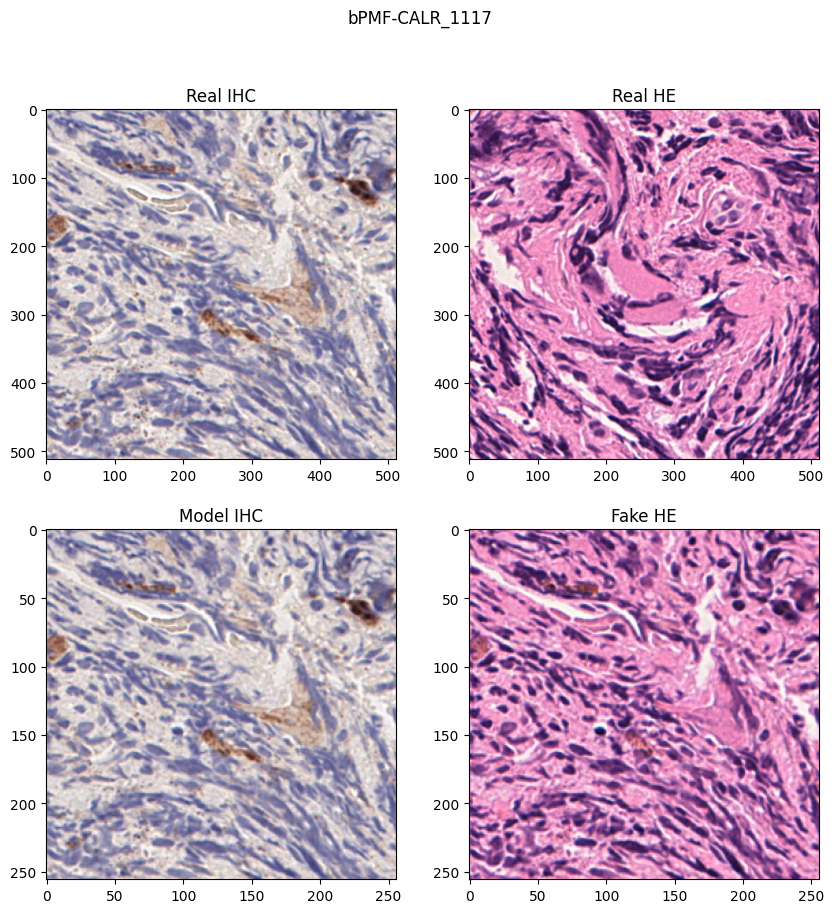

In [26]:
import cv2
import numpy as np
import random

num = random.randint(0, len(poor))

im = poor[num]

#load the images

real_ihc_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testA/"
real_he_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testB/"
results_folder = "/users/rittscher/qdv200/pytorch-CycleGAN-and-pix2pix/results/ihc2he/test_latest/images/"

real_ihc = cv2.imread(real_ihc_folder + "{}.png".format(im))
real_he = cv2.imread(real_he_folder + "{}.png".format(im))
fake_he = cv2.imread(results_folder + "{}_fake.png".format(im))
model_ihc = cv2.imread(results_folder + "{}_real.png".format(im))

#plot the images as subplots

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(real_ihc)
ax[0,0].set_title("Real IHC")
ax[0,1].imshow(real_he)
ax[0,1].set_title("Real HE")
ax[1,0].imshow(model_ihc)
ax[1,0].set_title("Model IHC")
ax[1,1].imshow(fake_he)
ax[1,1].set_title("Fake HE")

#show the plot
fig.suptitle(im)
plt.show()

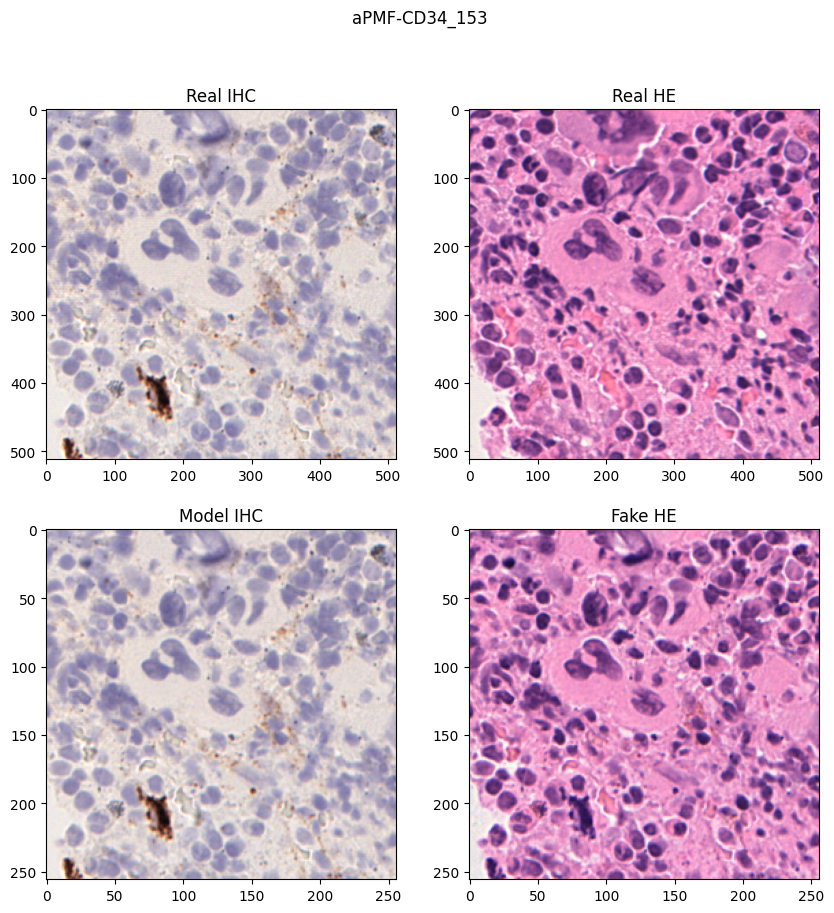

In [12]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

num = random.randint(0, len(med))

im = med[num]

#load the images

real_ihc_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testA/"
real_he_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testB/"
results_folder = "/users/rittscher/qdv200/pytorch-CycleGAN-and-pix2pix/results/ihc2he/test_latest/images/"

real_ihc = cv2.imread(real_ihc_folder + "{}.png".format(im))
real_he = cv2.imread(real_he_folder + "{}.png".format(im))
fake_he = cv2.imread(results_folder + "{}_fake.png".format(im))
model_ihc = cv2.imread(results_folder + "{}_real.png".format(im))

#plot the images as subplots


fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(real_ihc)
ax[0,0].set_title("Real IHC")
ax[0,1].imshow(real_he)
ax[0,1].set_title("Real HE")
ax[1,0].imshow(model_ihc)
ax[1,0].set_title("Model IHC")
ax[1,1].imshow(fake_he)
ax[1,1].set_title("Fake HE")

#show the plot
fig.suptitle(im)
plt.show()